In [1]:
import GQA_utils
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2025-07-26 17:49:43.277107: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
origin = torch.load("init.pt")
len(origin)

/tmp/ipykernel_3592975/3787325626.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  origin = torch.load("init.pt")


3

In [3]:
mean_pooled = torch.load("mean_pool.pt")
mean_pooled.keys()

/tmp/ipykernel_3592975/710946670.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mean_pooled = torch.load("mean_pool.pt")


dict_keys([0, 1, 2, 3, 4])

In [4]:
random_init = torch.load("random.pt")
random_init.keys()

/tmp/ipykernel_3592975/486766702.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  random_init = torch.load("random.pt")


dict_keys([0, 1, 2, 3, 4])

In [5]:
def plot_head_evolution_heatmap(cache_epochs: dict, layer_idx: int, title=None):
    """
    cache_epochs: dict[epoch: int] -> cka_cache
                  each cka_cache is [num_layers][num_heads]
                  and each head is a list of outputs to stack (samples × feature_dim)
    layer_idx: index in valid_layers (use layer_to_cache_idx[layer_num])
    """
    epoch_keys = sorted(cache_epochs.keys())
    num_epochs = len(epoch_keys)
    num_heads = len(cache_epochs[epoch_keys[0]][layer_idx])

    heatmap = np.zeros((num_heads, num_epochs))
    final_cache = cache_epochs[epoch_keys[-1]][layer_idx]

    for col, epoch in enumerate(epoch_keys):
        cache = cache_epochs[epoch][layer_idx]
        for head in range(num_heads):
            A = torch.cat(cache[head], dim=0)
            B = torch.cat(final_cache[head], dim=0)
            sim = GQA_utils.linear_cka(A, B)

            heatmap[head, col] = sim

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        heatmap,
        cmap="viridis",
        vmin=0, vmax=1,
        xticklabels=epoch_keys,
        cbar_kws={'label': 'CKA similarity to final'}
    )
    plt.xlabel("Epoch")
    plt.ylabel("Head")
    plt.title(title or f"Head-wise CKA to Final Epoch (Layer Index {layer_idx})")
    plt.tight_layout()
    plt.show()

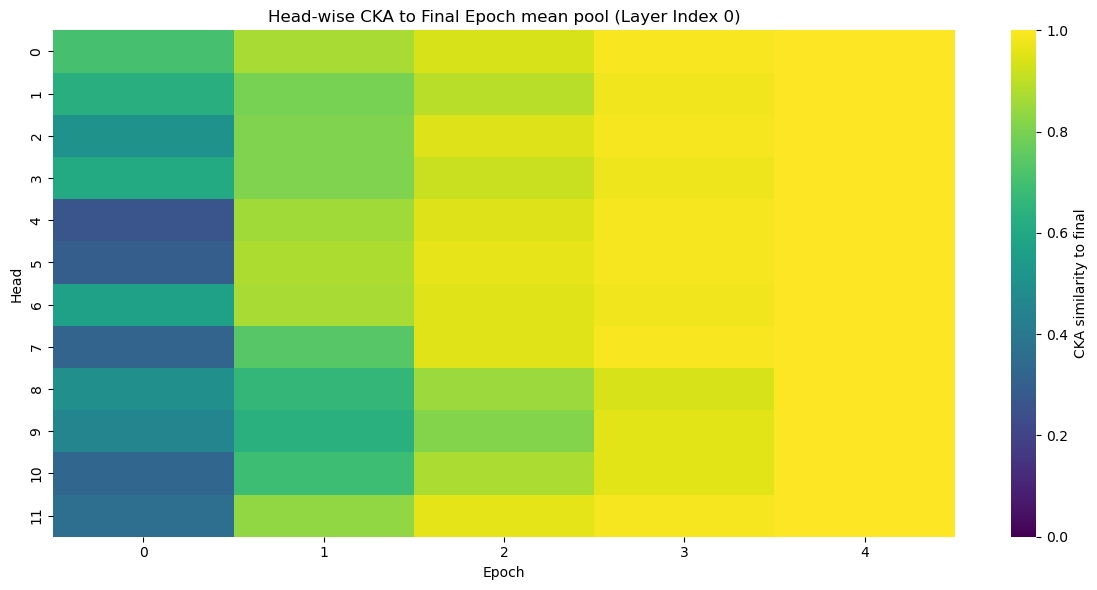

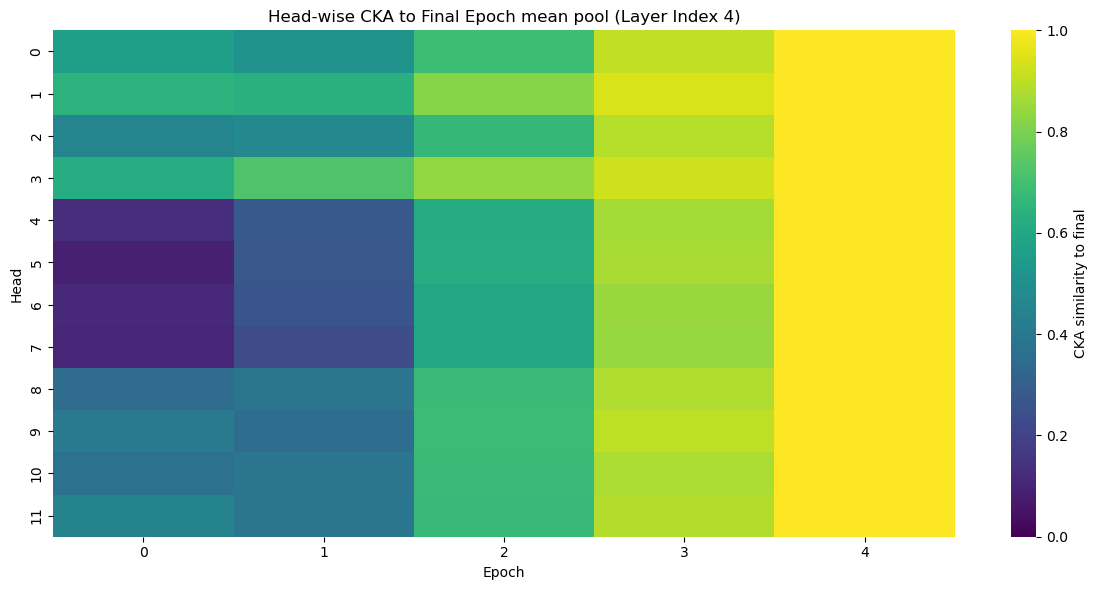

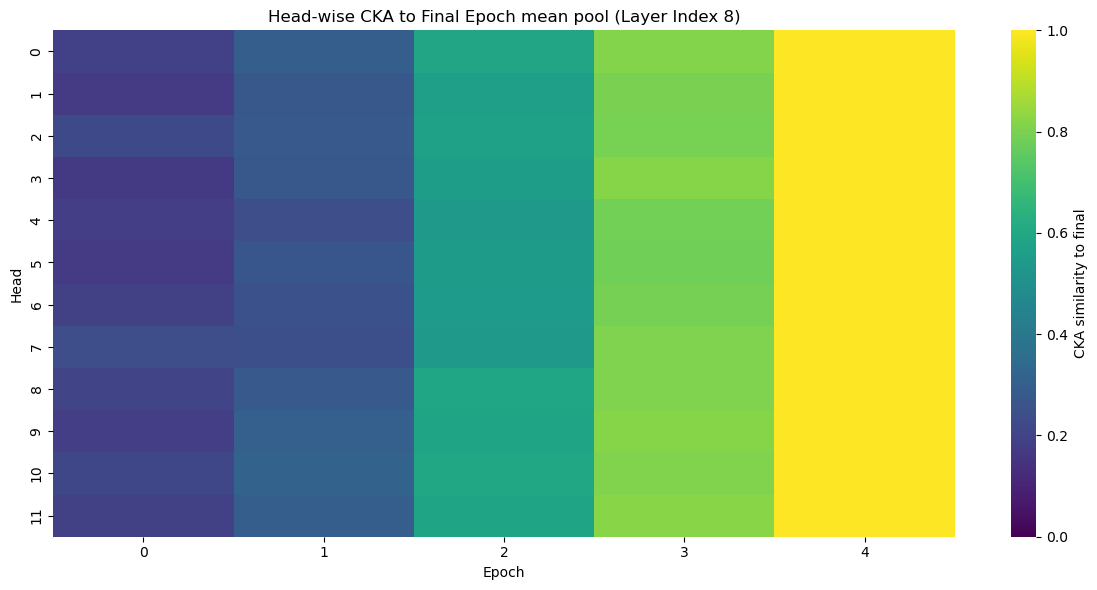

In [6]:
for layer in range(len(GQA_utils.valid_layers)):
    plot_head_evolution_heatmap(mean_pooled, layer, title=f"Head-wise CKA to Final Epoch mean pool (Layer Index {GQA_utils.valid_layers[layer]})")

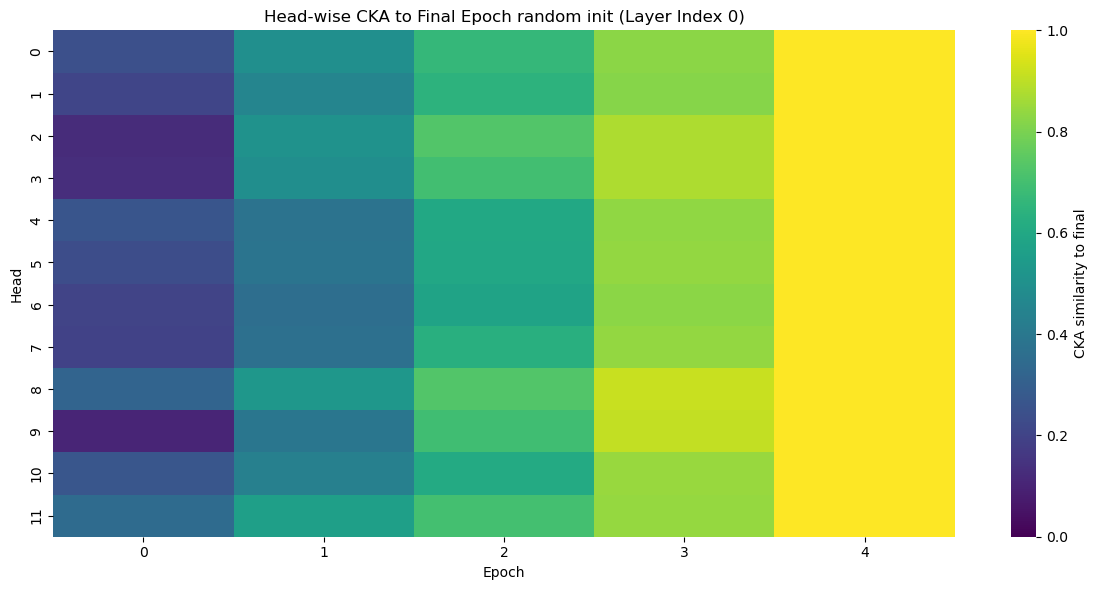

In [7]:
plot_head_evolution_heatmap(random_init, 0, title=f"Head-wise CKA to Final Epoch random init (Layer Index 0)")